Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


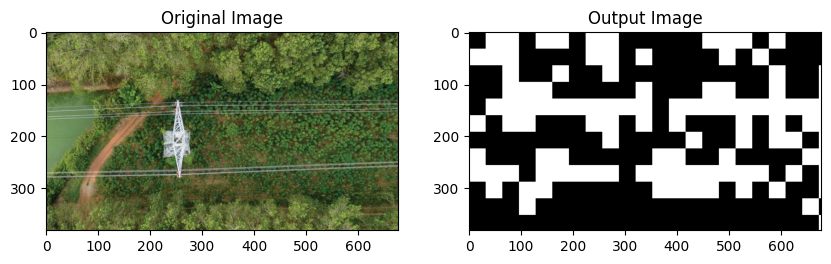

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def houghtransform(subimg):
    gray = cv2.cvtColor(subimg, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.Canny(binary, 3, 5, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=25, maxLineGap=5)
    if lines is not None:
        return True
    else:
        return False

def process_image(inputframe):
    m, n, r = inputframe.shape
    outputframe = np.zeros(inputframe.shape)
    for x in range(0, m, 32):
        for y in range(0, n, 32):
            subimg = inputframe[x:x+32, y:y+32,:]
            electricline = houghtransform(subimg)
            if electricline:
                outputframe[x:x+32, y:y+32,:] = (255,255,255)
            else:
                outputframe[x:x+32, y:y+32,:] = (0, 0, 0)
    return outputframe

# Replace 'image.jpg' with your actual image path
image_path = 'C:/Users/Owner/OneDrive - University Of Houston/Desktop/projects/vegetation project/dataset/electriclines/image9.jpg'
input_frame = cv2.imread(image_path)

# Process the image
output_image = process_image(input_frame)

# Display the original and output images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(output_image)
plt.title('Output Image')
plt.show()

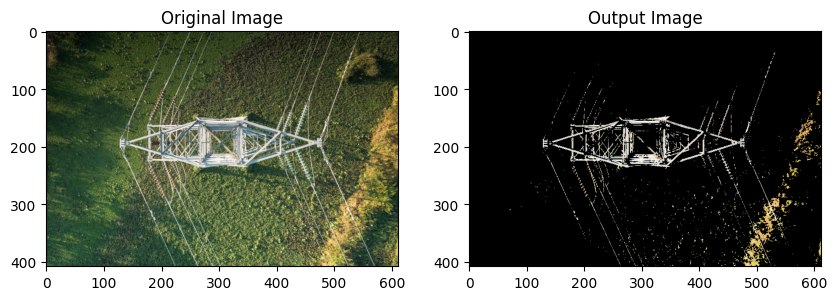

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def houghtransform(subimg):
    edges = cv2.Canny(subimg, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=100, maxLineGap=10)
    if lines is not None:
        return True
    else:
        return False

def process_image(inputframe):
    outputframe = np.zeros(inputframe.shape, dtype=np.uint8)
    for x in range(inputframe.shape[0]):
        for y in range(inputframe.shape[1]):
            pixel = inputframe[x, y]
            r, g, b = pixel
            if (0 <= r <= 192 and 0 <= g <= 192 and 0 <= b <= 192) or (0 <= r <= 120 and 0 <= g <= 120 and 0 <= b <= 120) or (44 <= r <= 188 and 45 <= g <= 201 and 14 <= b <= 175):
                subimg = np.array([[pixel]])
                electricline = houghtransform(subimg)
                if electricline:
                    outputframe[x, y] = (255, 255, 255)  # White for electric lines
                else:
                    outputframe[x, y] = (0, 0, 0)  # Black for no electric lines
            else:
                outputframe[x, y] = pixel  # Copy pixel as it is
    return outputframe


# Replace 'image.jpg' with your actual image path
image_path = 'C:/Users/Owner/OneDrive - University Of Houston/Desktop/projects/vegetation project/dataset/electriclines/image12.jpg'
input_frame = cv2.imread(image_path)

# Process the image
output_image = process_image(input_frame)

# Display the original and output images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Output Image')
plt.show()

In [5]:
import cv2

# Load the image
img = cv2.imread('C:/Users/Owner/OneDrive - University Of Houston/Desktop/projects/vegetation project/dataset/electriclines/image10.png')  # Provide the path to your image

def display_rgb(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        b, g, r = img[y, x]
        img_copy = img.copy()
        cv2.putText(img_copy, f'RGB: ({r}, {g}, {b})', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.imshow('image', img_copy)
    elif event == cv2.EVENT_MOUSELEAVE:
        cv2.imshow('image', img)

# Create a window and set the mouse callback
cv2.imshow('image', img)
cv2.setMouseCallback('image', display_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
